In [1]:
import cv2
import matplotlib.pyplot as plt
import os 
import numpy as np
import pathlib
import glob 
from PIL import Image

In [2]:
configFile = 'config/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenModule = 'config/frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozenModule, configFile)

In [4]:
model.setInputSize(320 , 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5 , 127.5 , 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x169d6fcd0>

In [5]:
classLabels = []
fileName = 'data/flags.txt'
with open(fileName , 'rt') as fpt : 
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
#if image is from train directory 

os.chdir('/Users/shahadaleissa/Desktop/Object-Detection-Comp/Detect_KSA_Flag_Competition/train')
path = os.getcwd()
print(path)

# if image is from test directory 

#os.chdir('/Users/shahadaleissa/Desktop/Object-Detection-Comp/Detect_KSA_Flag_Competition/test')
#path= os.getcwd()
#print(path)

/Users/shahadaleissa/Desktop/Object-Detection-Comp/Detect_KSA_Flag_Competition/train


In [7]:
dataset_dir = pathlib.Path(path)

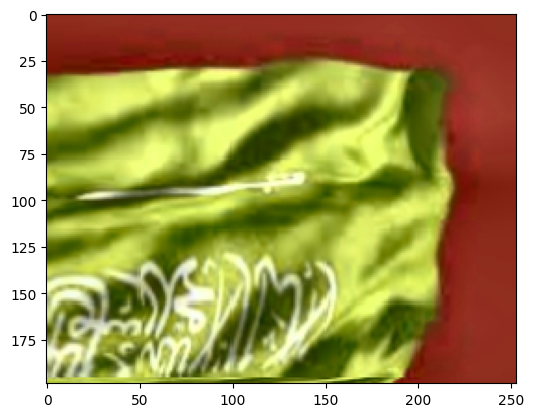

In [8]:
img=cv2.imread('SA_Flag_13.png')
plt.imshow(img)

In [9]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

[65]


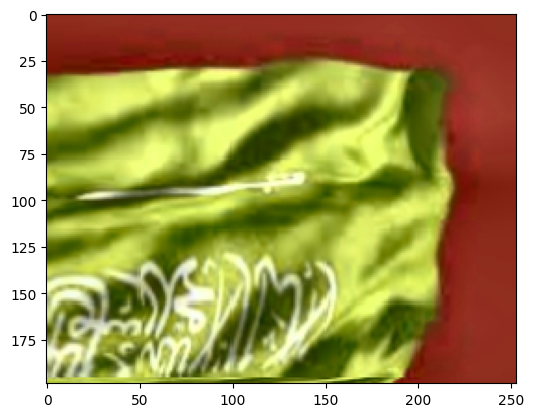

In [10]:

mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

if mask.any() <=0 :
    imask = mask<=0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
  
elif mask.any()>0:
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
   
ClassIndex , confidence , bbox = model.detect(green , confThreshold = 0.4, nmsThreshold= 0.4)
print(ClassIndex)
plt.imshow(green)

In [11]:
fontScale = 3
font = cv2.FONT_HERSHEY_PLAIN


for ClassInd , conf , boxes in zip (ClassIndex.flatten() , confidence.flatten() , bbox) : 
    cv2.rectangle(img , boxes ,(0,0,255) , 2)
    cv2.putText(img , classLabels[ClassInd-1] , (boxes[0] + 10 , boxes[1] + 40) , font , fontScale = fontScale , color = (0,0,255) , thickness = 3)

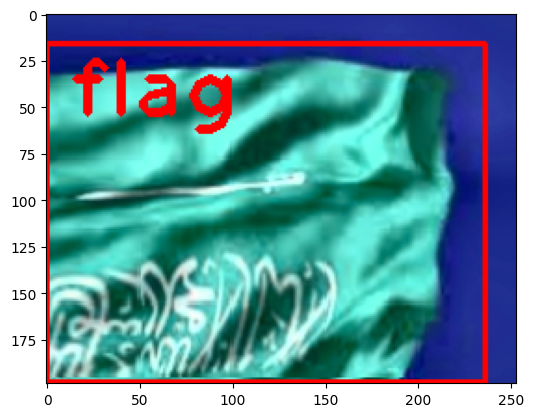

In [12]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))